In [1]:
import numpy as np
from astropy.table import QTable
%matplotlib inline

#import numpy as np
import astropy.units as u
import matplotlib.pyplot as plt

from astroplan import Observer, FixedTarget
from astropy.time import Time
from astropy.coordinates import SkyCoord
from astroplan.plots import plot_sky, plot_airmass

import warnings
warnings.filterwarnings('ignore', category=Warning)



>>> from astroplan import download_IERS_A
>>> download_IERS_A()
 [astroplan.utils]

>>> from astroplan import download_IERS_A
>>> download_IERS_A()



In [2]:
T = QTable.read('Rocks.csv', format="ascii.csv")
def diam(H,A):
    
    result = (1329 * (A ** (-1/2))) / (10 ** ((.2)*H))
    return result

DiamResult = diam(T['H'],T['A'])
DiamResult
T['Diam'] = DiamResult

mask1 = np.where(T['Diam'] > 200)
#T[mask1]
# 1 furlong = .201168 km 


In [3]:
.201168 * 1111

223.49764800000003

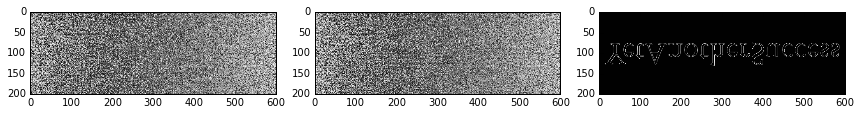

In [17]:
import astropy.io.fits as fits

I = fits.open('Noise.fits')
I2 = fits.open('Secret.fits')

xd = I[0].data
yd = I2[0].data

fig, ax = plt.subplots(1,3)
fig.set_size_inches(12,6)

fig.tight_layout()

ax[0].imshow(xd, cmap=plt.cm.gray)
ax[1].imshow(yd, cmap=plt.cm.gray)

z = xd - yd                          # Subtract the images pixel by pixel

ax[2].imshow(z, cmap=plt.cm.gray);